In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
import os

In [34]:
# Define paths and load the dataset
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
datasets_dir = os.path.join(parent_dir, 'datasets')
path_dataset = os.path.join(datasets_dir, "Ice_cream selling data.csv")

data_frame = pd.read_csv(path_dataset)
data_frame.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


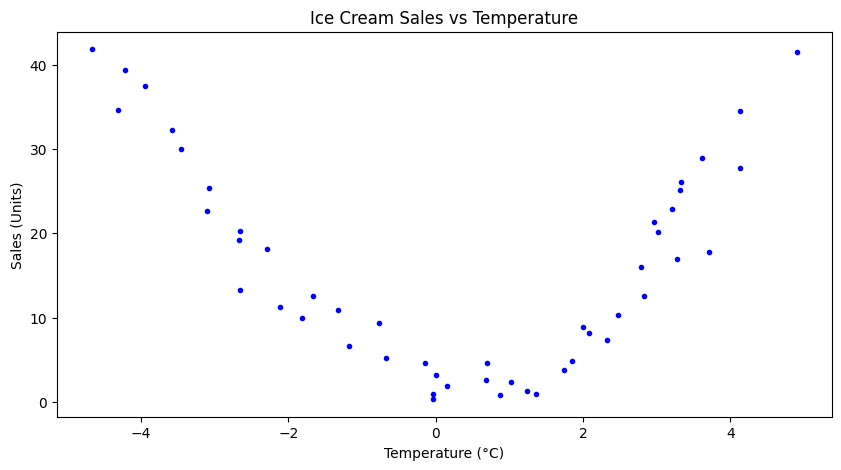

In [ ]:
# Preliminary plotting
plt.figure(figsize=(10, 5))
plt.plot(data_frame["Temperature (°C)"], data_frame["Ice Cream Sales (units)"], "b.")
plt.xlabel("Temperature (°C)")
plt.ylabel("Sales (Units)")
plt.title("Ice Cream Sales vs Temperature")
plt.show()

In [36]:
# Checks if dependent variable is in data frame, assign it to y and delete it
if 'Ice Cream Sales (units)' in data_frame.columns: 
    y = data_frame['Ice Cream Sales (units)'].to_numpy()    
    y = y.reshape(-1, 1)
    data_frame.drop(columns='Ice Cream Sales (units)', inplace=True)


x = data_frame.to_numpy() # Independent variables nxm
print(x.shape, y.shape)

(49, 1) (49, 1)


Train score:  0.9376718014208538
Test score:  0.9111196189613652


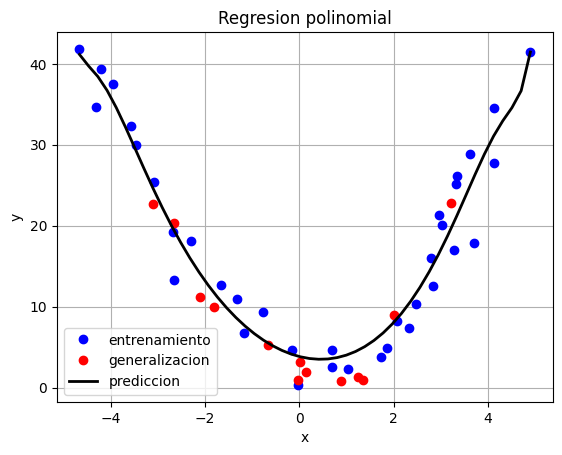

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y) # %75 datos para entrenar, %25 datos para probar

#
model = Pipeline([('poly',PolynomialFeatures(degree=25)),('scaler',StandardScaler()),('reg',Ridge(0.5))])
model.fit(x_train,y_train)

#
print('Train score: ', model.score(x_train,y_train))
print('Test score: ', model.score(x_test,y_test))

#
x_plot = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_plot = model.predict(x_plot)

plt.figure()
plt.grid()
plt.title('Regresion polinomial')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'ro')
plt.plot(x_plot,y_plot,'k-',lw=2)

plt.legend(['entrenamiento','generalizacion','prediccion'])

plt.show()